In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from chainer import cuda, Variable, FunctionSet, optimizers
import chainer.functions as F
from sklearn.cross_validation import train_test_split
import sys
import csv
from pprint import pprint 

plt.style.use('ggplot')


In [8]:
# 確率的勾配降下法におけるミニバッチ数
batchsize = 20

# 学習の繰り返し回数
n_epoch = 100

# 中間層の数
n_units = 20


#=================================================
# csvファイルからデータを取り出し、listに格納
def set_data():

        filename = "../../../data/secondary_selection/input_data2_2"
        
        f = open('%s.csv' % filename, 'rU')
        data = csv.reader(f)

        data_set = []
        target_set = []
        for line in data:
                data_set.append(line[1:16])
                target_set.append(line[16])
        f.close()
        np_dataSet = np.array(data_set, dtype=np.float32)
        np_targetSet = np.array(target_set, dtype=np.int32)
        return np_dataSet, np_targetSet

#=================================================

data, target = set_data()

# <!--- start_debug
#print data.shape
#print target.shape
#       end_debug ----> 


# 学習用データをN個、検証用データを残りの個数と設定
# Nの値は暫定的なもの
#N = 300
#x_train, x_test = np.split( data, [N])  
#y_train, y_test = np.split( target, [N]) 
#N_test = y_test.size
#print data
#print target



In [9]:
# 多層パーセプトロンモデルの設定
# 入力 15次元、出力 2次元
model = FunctionSet(l1=F.Linear(15, n_units),
                    l2=F.Linear(n_units, n_units),
                    l3=F.Linear(n_units, n_units),
                    l4=F.Linear(n_units, n_units),
                    l5=F.Linear(n_units, n_units),
                    l6=F.Linear(n_units, 2))

# Neural net architecture
# ニューラルネットの構造
def forward(x_data, y_data, train=True ):
        x, t = Variable(x_data), Variable(y_data)
        h1 = F.dropout(F.relu(model.l1(x)), ratio=.5, train=train)
        h2 = F.dropout(F.relu(model.l2(h1)), ratio=.5, train=train)
        h3 = F.dropout(F.relu(model.l3(h2)), ratio=.5, train=train)
        h4 = F.dropout(F.relu(model.l4(h3)), ratio=.5, train=train)
        h5 = F.dropout(F.relu(model.l5(h4)), ratio=.5, train=train)
        y = model.l6(h5)
        # 0/1の2クラス分類なので誤差関数として、ソフトマックス関数
        # を用いて、誤差を導出
   
                                
        #print '-'*50
        #print ' h3'
        #print '-'*50
        #print vars(h3)
                        
        #print '-'*50
        #print ' y'
        #print '-'*50
        #print vars(y)
 
        
        return F.softmax_cross_entropy(y, t), F.accuracy(y, t), F.recall(y, t), F.precision(y, t)



In [10]:
# Setup optimizer
optimizer = optimizers.Adam()
optimizer.setup(model)

train_loss = []
train_acc= []
train_rec = []
train_pre = []
test_loss = []
test_acc = []
test_rec = []
test_pre = []

l1_W = []
l2_W = []
l3_W = []
l4_W = []
l5_W = []
l6_W = []



0.444444447756
9.0
0.5
8.0
0.375
8.0
0.5
8.0
0.285714298487
7.0
0.454545468092
11.0
0.428571432829
7.0
0.666666686535
9.0
0.555555582047
9.0
0.5625
16.0
0.444444447756
9.0
0.75
8.0
0.444444447756
9.0
0.5
10.0
0.20000000298
10.0
0.333333343267
12.0
0.222222223878
9.0
0.666666686535
9.0
0.444444447756
9.0
0.555555582047
9.0
0.444444447756
9.0
0.25
8.0
0.40000000596
5.0
0.54545456171
11.0
0.54545456171
11.0
0.5
12.0
0.54545456171
11.0
0.0909090936184
11.0
0.428571432829
7.0
0.40000000596
5.0
0.5
8.0
0.583333313465
12.0
0.699999988079
10.0
0.5
6.0
0.444444447756
9.0
0.20000000298
5.0
0.222222223878
9.0
0.600000023842
10.0
0.363636374474
11.0
0.454545468092
11.0
0.25
8.0
0.454545468092
11.0
0.428571432829
7.0
0.54545456171
11.0
0.20000000298
10.0
0.0
9.0
0.333333343267
6.0
0.555555582047
9.0
0.375
8.0
0.300000011921
10.0
0.454545468092
11.0
0.416666656733
12.0
0.285714298487
7.0
0.615384638309
13.0
0.375
8.0
0.40000000596
10.0
0.600000023842
10.0
0.375
8.0
0.111111111939
9.0
0.25
8.0
0.4444

[]

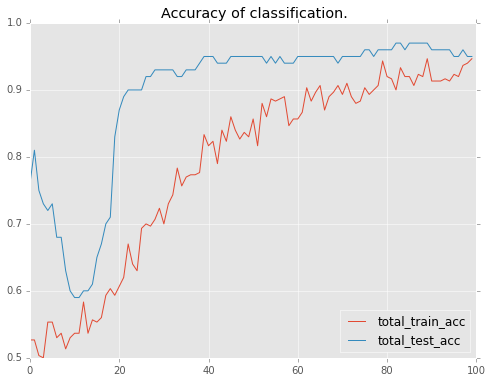

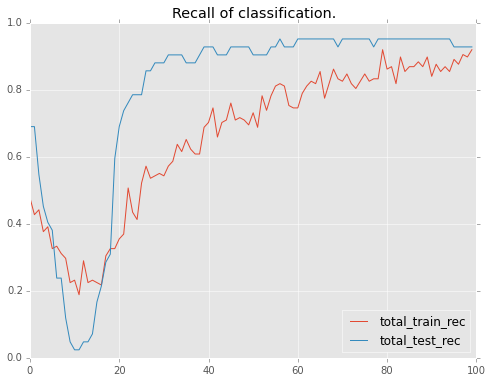

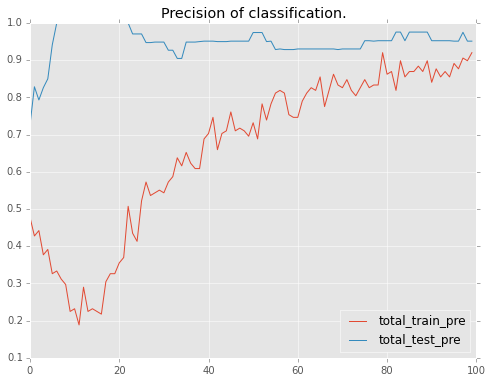

In [11]:
##インプットデータ総数
#n_kf = 400
##fold数
#n_kf_folds = 4
##trainデータ数
#N = n_kf  *  (( n_kf_folds-1)*1.0 / n_kf_folds)
#N = int(N)
##testデータ数
#N_test = n_kf - N

#cv配列初期化
#total_train_loss = [0] * n_epoch
#total_train_acc = [0] * n_epoch
#total_train_rec = [0] * n_epoch
#total_train_pre = [0] * n_epoch
#total_test_loss = [0] * n_epoch


total_train_loss = []
total_train_acc = []
total_train_rec = []
total_train_pre = []
total_test_loss = []
total_test_acc = []
total_test_rec = []
total_test_pre = []




x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

train_size = x_train.T[0].size
test_size = x_test.T[0].size

#print kf_train_index[perm[0:15]]
    
#print kf_train_index
    
# Learning loop
for epoch in xrange(1, n_epoch+1):
    #print 'epoch', epoch

    # training
    # N個の順番をランダムに並び替える
    perm = np.random.permutation(train_size)
    sum_accuracy = 0
    sum_loss = 0
    sum_recall = 0
    sum_precision = 0
    total_rec_size = 0
    total_pre_size = 0
    # 0〜Nまでのデータをバッチサイズごとに使って学習
    for i in xrange(0, train_size, batchsize):
        x_batch = x_train[perm[i:i+batchsize]]
        y_batch = y_train[perm[i:i+batchsize]]
        # 勾配を初期化
        optimizer.zero_grads()
        # 順伝播させて誤差と精度を算出
        loss, acc, rec, pre = forward(x_batch, y_batch)
        # 誤差逆伝播で勾配を計算
        loss.backward()
        optimizer.update()
        
        sum_loss += float(cuda.to_cpu(loss.data)) * batchsize
        sum_accuracy += float(cuda.to_cpu(acc.data)) * batchsize
        sum_recall += float(cuda.to_cpu(rec.data[0])) * rec.data[1]
        sum_precision += float(cuda.to_cpu(pre.data[0])) * pre.data[1]
        total_rec_size += rec.data[1]
        total_pre_size += pre.data[1]
        
        print rec.data[0]
        print rec.data[1]
                    
                    
                    
    # 訓練データの誤差と、正解精度を表示
    #print 'train mean loss={}, accuracy={}, recall={}, precision={}'.format(sum_loss / N, sum_accuracy / N, sum_recall / N, sum_precision / N)
                
    total_train_loss.append(sum_loss / train_size)
    total_train_acc.append(sum_accuracy / train_size)
    total_train_rec.append(sum_recall / total_rec_size)
    total_train_pre.append(sum_precision / total_rec_size)


    # evaluation
    # テストデータで誤差と、正解精度を算出し汎化性能を確認
    sum_accuracy = 0
    sum_loss     = 0
    sum_recall = 0
    sum_precision = 0
    total_rec_size = 0
    total_pre_size = 0
    for i in xrange(0, test_size, batchsize):
        x_batch = x_test[i:i+batchsize]
        y_batch = y_test[i:i+batchsize]

        # 順伝播させて誤差と精度を算出
        loss, acc, rec, pre = forward(x_batch, y_batch, train=False)
          
        #print( cuda.to_cpu(loss.data))
        #print( cuda.to_cpu(rec.data))
        #print( cuda.to_cpu(pre.data))
        sum_loss     += float(cuda.to_cpu(loss.data)) * batchsize
        sum_accuracy += float(cuda.to_cpu(acc.data)) * batchsize
        sum_recall += float(cuda.to_cpu(rec.data[0])) * rec.data[1]
        sum_precision += float(cuda.to_cpu(pre.data[0])) * pre.data[1]
        total_rec_size += rec.data[1]
        total_pre_size += pre.data[1]
        
        #print rec.data[0]
        #print rec.data[1]
                

            # テストデータでの誤差と、正解精度を表示
            #print 'test  mean loss={}, accuracy={}, recall={}, precision={}'.format(sum_loss / N_test, sum_accuracy / N_test, sum_recall / N_test, sum_precision / N_test)
            #test_loss.append( sum_loss / N_test)
            #test_acc.append( sum_accuracy / N_test)
            #test_rec.append(sum_recall / N_test)
            #test_pre.append(sum_precision / N_test) 
            
            
    total_test_loss.append(sum_loss / test_size)
    total_test_acc.append(sum_accuracy / test_size)
    total_test_rec.append(sum_recall / total_rec_size)
    total_test_pre.append(sum_precision / total_pre_size)
        

        
    # 学習したパラメーターを保存
    l1_W.append(model.l1.W)
    l2_W.append(model.l2.W)
    l3_W.append(model.l3.W)
    l4_W.append(model.l4.W)
    l5_W.append(model.l5.W)
    l6_W.append(model.l6.W)
        
            #l1_W = np.append( l1_W, model.l1.W)
        
                      
            #pprint(vars(model.l1))
            #pprint(model.l1.W[0:2])

        
            
# 精度と誤差をグラフ描画
plt.figure(figsize=(8,6))
plt.plot(range(len(total_train_acc)), total_train_acc)
plt.plot(range(len(total_test_acc)), total_test_acc)
plt.legend(["total_train_acc","total_test_acc"],loc=4)
plt.title("Accuracy of classification.")
plt.plot()


plt.figure(figsize=(8,6))
plt.plot(range(len(total_train_rec)), total_train_rec)
plt.plot(range(len(total_test_rec)), total_test_rec)
plt.legend(["total_train_rec","total_test_rec"],loc=4)
plt.title("Recall of classification.")
plt.plot()


plt.figure(figsize=(8,6))
plt.plot(range(len(total_train_pre)), total_train_pre)
plt.plot(range(len(total_test_pre)), total_test_pre)
plt.legend(["total_train_pre","total_test_pre"],loc=4)
plt.title("Precision of classification.")
plt.plot()

In [17]:
print total_test_acc[99]
print total_test_rec[99]
print total_test_pre[99]


0.969999992847
1.0
0.93333332936


In [11]:
# 学習したパラメータを出力
#print l1_W

#print l2_W
#print l3_W

l1 = l1_W[0].T
l2 = l2_W[0].T
l3 = l3_W[0].T
l4 = l4_W[0].T


param = l1.dot(l2).dot(l3).dot(l4)

print param

[[ -1.12955451   1.22824311]
 [-10.1351862    8.81788445]
 [ -4.75805569   4.07091665]
 [  0.50168824  -0.26521993]
 [ -1.82621729   1.53926611]
 [ -2.06621075   1.48655665]
 [ -0.68478382   0.80154461]
 [  0.9721148   -0.6993469 ]
 [-19.12200737  16.40470886]
 [-43.12466431  37.87928009]
 [ -3.7563107    3.06845331]
 [ -3.87720203   3.26878977]
 [ -3.46961355   3.32651782]
 [ -7.88303661   6.9858675 ]
 [-30.58934784  26.61063766]]


In [36]:
print total_train_acc

[0.8474999944368998, 0.874166662991047, 0.8841666628917059, 0.8883333290616672, 0.9041666626930237, 0.9024999956289927, 0.9233333279689153, 0.9233333299557368, 0.9299999982118607, 0.9408333281675975, 0.9416666636864344, 0.9458333273728688, 0.9524999976158142, 0.9374999970197677, 0.9466666628917058, 0.9516666620969771, 0.9508333285649617, 0.947499997417132, 0.9549999972184499, 0.9499999970197677, 0.9574999948342641, 0.9608333289623261, 0.962499996026357, 0.9608333289623261, 0.9583333263794581, 0.968333328763644, 0.9608333299557368, 0.9666666607062022, 0.9658333291610082, 0.9641666620969773, 0.9616666595141092, 0.9741666624943415, 0.9741666615009308, 0.9816666622956594, 0.9633333285649617, 0.9741666634877524, 0.9699999968210857, 0.976666663090388, 0.9741666615009307, 0.9683333287636439, 0.975833327571551, 0.9741666624943417, 0.9741666624943415, 0.9758333295583725, 0.9749999950329463, 0.9691666622956594, 0.977499994635582, 0.9741666615009308, 0.9741666624943415, 0.9774999966224034]


In [23]:


#x_train, y_train, x_test, y_test = train_test_split(data, target, test_size=0.25, random_state=42)
#print x_train.shape 
#print x_train.T[0].size


x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

x_train.T

print data.shape
print x_train.shape
print x_train


(400, 15)
(300, 15)
[[-0.14500919 -0.03064903 -0.04545277 ...,  1.75918448  0.56636071
   1.68415391]
 [-0.08098452 -1.04972184 -0.44712448 ...,  0.12621951  0.23282823
   0.03972061]
 [-0.0383014   0.81443572 -0.02798878 ..., -1.50674546  0.89989316
   1.68415391]
 ..., 
 [-0.80659753 -0.55261314  0.68803471 ...,  0.12621951 -0.10070425
   1.68415391]
 [ 0.75133628  0.5161705  -0.02798878 ...,  1.75918448 -0.43423671
  -1.60471272]
 [-0.76391441 -0.0057936  -0.56937242 ...,  3.39214945 -0.10070425
   0.03972061]]
